In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/play-store-dataset/apps.csv
/kaggle/input/play-store-dataset/user_reviews.csv


# Advance Project

# 1.Reading dataset

In [2]:
#read in dataset
import pandas as pd
apps_with_duplicates=pd.read_csv('/kaggle/input/play-store-dataset/apps.csv')

#Drop duplicates
apps=apps_with_duplicates.drop_duplicates()

#print the total number of appa
print('Total number of appa in the dataset = ',apps.count())
#Have a look at a random sample pf 5 rows
n=5
apps.sample(n)

Total number of appa in the dataset =  Unnamed: 0        9659
App               9659
Category          9659
Rating            8196
Reviews           9659
Size              8432
Installs          9659
Type              9658
Price             9659
Content Rating    9659
Genres            9659
Last Updated      9659
Current Ver       9651
Android Ver       9657
dtype: int64


,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1520,1912,Shoot Bubble - Fruit Splash,GAME,4.6,29445,29M,"5,000,000+",Free,0,Everyone,Casual,"May 11, 2018",14.0,4.0.3 and up
9555,10735,FP VoiceBot,FAMILY,NaN,17,0.157,100+,Paid,$0.99,Mature 17+,Entertainment,"November 25, 2015",1.2,2.1 and up
6138,7182,US 115th CD,TRAVEL_AND_LOCAL,NaN,0,5.7M,5+,Free,0,Everyone,Travel & Local,"November 3, 2017",106,4.0.3 and up
6375,7422,CJ'S TIRE AND AUTO INC.,PRODUCTIVITY,5.0,5,11M,100+,Free,0,Everyone,Productivity,"May 30, 2018",1.0.1,4.1 and up
5809,6840,Catholic La Bu Zo Kam,BOOKS_AND_REFERENCE,5.0,23,NaN,500+,Free,0,Everyone,Books & Reference,"March 20, 2016",0.0.1,4.0 and up


# 2. Data cleaning
#Missing value handlings

In [3]:
apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      9659 non-null   int64  
 1   App             9659 non-null   object 
 2   Category        9659 non-null   object 
 3   Rating          8196 non-null   float64
 4   Reviews         9659 non-null   int64  
 5   Size            8432 non-null   object 
 6   Installs        9659 non-null   object 
 7   Type            9658 non-null   object 
 8   Price           9659 non-null   object 
 9   Content Rating  9659 non-null   object 
 10  Genres          9659 non-null   object 
 11  Last Updated    9659 non-null   object 
 12  Current Ver     9651 non-null   object 
 13  Android Ver     9657 non-null   object 
dtypes: float64(1), int64(2), object(11)
memory usage: 1.0+ MB


In [4]:
print(apps.isnull().sum())

Unnamed: 0           0
App                  0
Category             0
Rating            1463
Reviews              0
Size              1227
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64


In [5]:
apps=apps.dropna()
print(apps.isnull().sum())

Unnamed: 0        0
App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64


In [6]:
apps.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7021 entries, 0 to 9658
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      7021 non-null   int64  
 1   App             7021 non-null   object 
 2   Category        7021 non-null   object 
 3   Rating          7021 non-null   float64
 4   Reviews         7021 non-null   int64  
 5   Size            7021 non-null   object 
 6   Installs        7021 non-null   object 
 7   Type            7021 non-null   object 
 8   Price           7021 non-null   object 
 9   Content Rating  7021 non-null   object 
 10  Genres          7021 non-null   object 
 11  Last Updated    7021 non-null   object 
 12  Current Ver     7021 non-null   object 
 13  Android Ver     7021 non-null   object 
dtypes: float64(1), int64(2), object(11)
memory usage: 822.8+ KB


# Cleaning Columns and Type to Numberical

In [7]:
apps

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9651,10833,Chemin (fr),BOOKS_AND_REFERENCE,4.8,44,0.619,"1,000+",Free,0,Everyone,Books & Reference,"March 23, 2014",0.8,2.2 and up
9652,10834,FR Calculator,FAMILY,4.0,7,2.6M,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
9654,10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
9655,10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up


In [8]:
apps.columns

Index(['Unnamed: 0', 'App', 'Category', 'Rating', 'Reviews', 'Size',
       'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated',
       'Current Ver', 'Android Ver'],
      dtype='object')

In [9]:
apps.drop(['Unnamed: 0'],axis = 1,inplace=True)

In [10]:
# List of characters to remove
chars_to_remove = [',','$','+','M','k']
chars_to_remove

[',', '$', '+', 'M', 'k']

In [11]:
# List of column names to clean
cols_to_clean = ['Installs','Size','Price']
cols_to_clean

['Installs', 'Size', 'Price']

In [12]:
# List of characters to remove
chars_to_remove = [',','$','+','M','k']
# List of column names to clean
cols_to_clean = ['Installs','Size','Price']

# Loop for each column
for col in cols_to_clean:
    # Replace each character with an empty string
    for char in chars_to_remove:
        apps[col] = apps[col].str.replace(char, '')
    # Convert col to numeric
    apps[col] = pd.to_numeric(apps[col])

In [13]:
apps.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7021 entries, 0 to 9658
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             7021 non-null   object 
 1   Category        7021 non-null   object 
 2   Rating          7021 non-null   float64
 3   Reviews         7021 non-null   int64  
 4   Size            7021 non-null   float64
 5   Installs        7021 non-null   int64  
 6   Type            7021 non-null   object 
 7   Price           7021 non-null   float64
 8   Content Rating  7021 non-null   object 
 9   Genres          7021 non-null   object 
 10  Last Updated    7021 non-null   object 
 11  Current Ver     7021 non-null   object 
 12  Android Ver     7021 non-null   object 
dtypes: float64(3), int64(2), object(8)
memory usage: 767.9+ KB


# 3.Exploring app Categories

In [14]:
!pip install plotly

In [15]:
!pip install plotly-express

In [16]:
apps['Category']

0            ART_AND_DESIGN
1            ART_AND_DESIGN
2            ART_AND_DESIGN
3            ART_AND_DESIGN
4            ART_AND_DESIGN
               ...         
9651    BOOKS_AND_REFERENCE
9652                 FAMILY
9654                 FAMILY
9655                 FAMILY
9658              LIFESTYLE
Name: Category, Length: 7021, dtype: object

In [17]:
apps['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [18]:
apps['Category'].value_counts()

Category
FAMILY                 1511
GAME                    832
TOOLS                   625
PERSONALIZATION         274
LIFESTYLE               269
MEDICAL                 266
FINANCE                 258
PRODUCTIVITY            223
BUSINESS                222
SPORTS                  221
PHOTOGRAPHY             204
HEALTH_AND_FITNESS      191
COMMUNICATION           188
SOCIAL                  156
NEWS_AND_MAGAZINES      154
SHOPPING                146
TRAVEL_AND_LOCAL        141
BOOKS_AND_REFERENCE     141
DATING                  122
VIDEO_PLAYERS           112
MAPS_AND_NAVIGATION      94
EDUCATION                88
FOOD_AND_DRINK           72
ENTERTAINMENT            64
AUTO_AND_VEHICLES        63
LIBRARIES_AND_DEMO       60
ART_AND_DESIGN           58
HOUSE_AND_HOME           50
WEATHER                  50
COMICS                   47
PARENTING                44
EVENTS                   38
BEAUTY                   37
Name: count, dtype: int64

In [19]:
x=apps['Category'].value_counts().sort_values(ascending=False)

In [20]:
x.index

Index(['FAMILY', 'GAME', 'TOOLS', 'PERSONALIZATION', 'LIFESTYLE', 'MEDICAL',
       'FINANCE', 'PRODUCTIVITY', 'BUSINESS', 'SPORTS', 'PHOTOGRAPHY',
       'HEALTH_AND_FITNESS', 'COMMUNICATION', 'SOCIAL', 'NEWS_AND_MAGAZINES',
       'SHOPPING', 'BOOKS_AND_REFERENCE', 'TRAVEL_AND_LOCAL', 'DATING',
       'VIDEO_PLAYERS', 'MAPS_AND_NAVIGATION', 'EDUCATION', 'FOOD_AND_DRINK',
       'ENTERTAINMENT', 'AUTO_AND_VEHICLES', 'LIBRARIES_AND_DEMO',
       'ART_AND_DESIGN', 'HOUSE_AND_HOME', 'WEATHER', 'COMICS', 'PARENTING',
       'EVENTS', 'BEAUTY'],
      dtype='object', name='Category')

In [21]:
x.values

array([1511,  832,  625,  274,  269,  266,  258,  223,  222,  221,  204,
        191,  188,  156,  154,  146,  141,  141,  122,  112,   94,   88,
         72,   64,   63,   60,   58,   50,   50,   47,   44,   38,   37])

In [22]:
import plotly #!pip install plotly !pip install plotly-express
plotly.offline.init_notebook_mode(connected=True)

import plotly.graph_objs as go

#Print the total number of unique categories
num_categories=len(apps['Category'].unique())
print('Number of categories=',num_categories)

num_apps_in_category=apps['Category'].value_counts().sort_values(ascending=False)

data=[go.Bar(
    x=num_apps_in_category.index,#index=category name
    y=num_apps_in_category.values,#value=count
)]
plotly.offline.iplot(data)



Number of categories= 33


# 4.Distribution of app rating

In [23]:
# Average rating of apps
avg_app_rating = apps['Rating'].mean()
print('Average app rating = ', avg_app_rating)

#Distribution of apps according to their ratings
data = [go.Histogram(
   x= apps['Rating']
)]

layout={'shapes':[{
    'type':'line',
    'x0':avg_app_rating,
    'y0':0,
    'x1':avg_app_rating,
    'y1':1000,
    'line':{'dash':'dashdot'}
}]
       }
plotly.offline.iplot({'data':data,'layout':layout})

Average app rating =  4.160703603475289


# 5.Size and price of an app

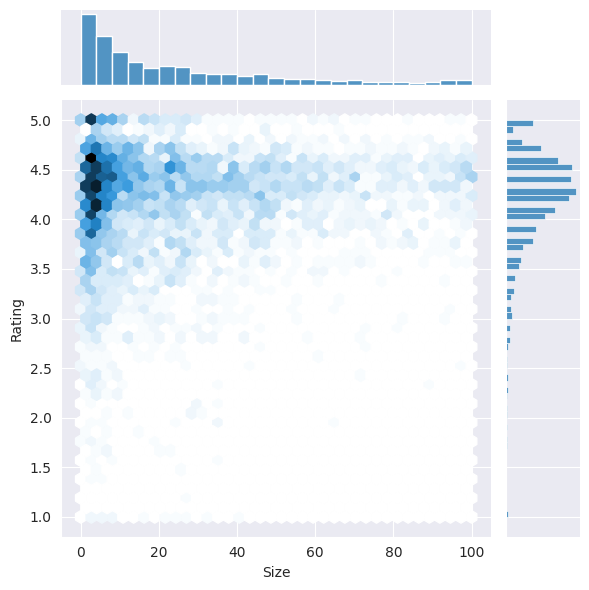

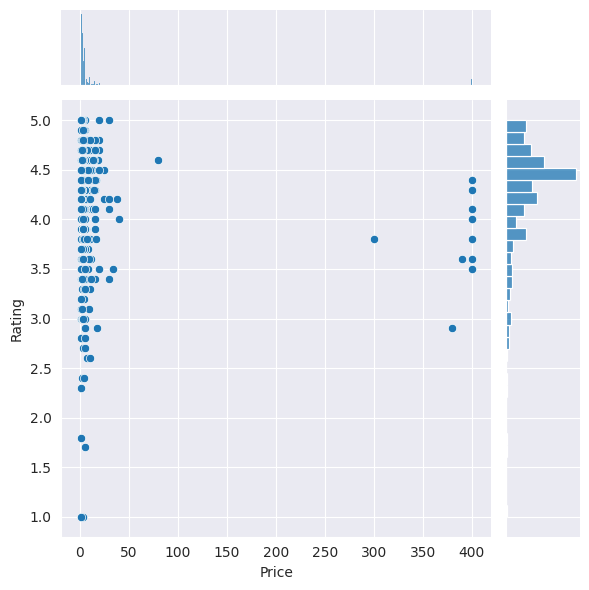

In [24]:
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")
import warnings
warnings.filterwarnings("ignore")

#subset for categories with at least 250 apps
large_categories = apps.groupby('Category').filter(lambda x: len(x) >=250).reset_index()
plt1 = sns.jointplot(x=large_categories['Size'],y=large_categories['Rating'],kind='hex')

paid_apps=apps[apps['Type']=='Paid']

plt2 = sns.jointplot(x=paid_apps['Price'],y=paid_apps['Rating'])